# **Gun Deaths in America**

## **Our team members:**        
> Kenneth Saul Cornejo Vertiz   
> Paula   
> Rohit   
> Guorui   
> Derek  

In [2]:
#import all the libraries we are going to use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#add our Data Base
df = pd.read_csv("gun_deaths.csv")
df.head()

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED


# Dictionary

- **Year:** The year when the death occurred, providing a temporal context. `2012-2014`   
- **Month:** The month of the incident, adding more granularity to the timeline. `1-12`   
- **Intent:** Categorizes the death by intent, such as suicide or homicide, essential for understanding the circumstances.   
- **Police:** Indicates whether a police officer was involved in the death. `0 - 1`   
- **Sex:** The gender of the deceased, crucial for demographic analysis.   
- **Age:** The age of the deceased, providing insights into age-related trends.   
- **Race:** The race of the deceased, essential for understanding racial disparities.   
- **Place:** The location of the incident, such as home or street, which can influence the context of the death.   
- **Education:** Educational background of the deceased, offering a socio-economic dimension.   

In [3]:
#Checking how many data is missing in the data base
df.isnull().sum()

year            0
month           0
intent          1
police          0
sex             0
age            18
race            0
place        1384
education    1422
dtype: int64

In [4]:
#Checking the type of variable that every column have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100798 non-null  int64  
 1   month      100798 non-null  int64  
 2   intent     100797 non-null  object 
 3   police     100798 non-null  int64  
 4   sex        100798 non-null  object 
 5   age        100780 non-null  float64
 6   race       100798 non-null  object 
 7   place      99414 non-null   object 
 8   education  99376 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


In [5]:
#Change every numerical variable to the mean of all the data in that column

df=df.fillna(df.mean())

C:\Users\covek\AppData\Local\Temp\ipykernel_16268\3195115663.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [6]:
#See how much data is still missing
df.isnull().sum()

year            0
month           0
intent          1
police          0
sex             0
age             0
race            0
place        1384
education    1422
dtype: int64

In [7]:
#See the total number of rows and columns
df.shape

(100798, 9)

In [8]:
#Change the missing Cualitative variables to the mode
df = df.fillna(df.mode().iloc[0])

In [9]:
df.isnull().sum()

year         0
month        0
intent       0
police       0
sex          0
age          0
race         0
place        0
education    0
dtype: int64

In [10]:
#Print the last rows of the data base
df.tail(6)

,year,month,intent,police,sex,age,race,place,education
100792,2014,12,Homicide,0,M,31.0,Black,Other specified,HS/GED
100793,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
100794,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
100795,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
100796,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS
100797,2014,10,Homicide,0,M,43.0,Black,Other unspecified,HS/GED


In [11]:
#See how much and the name of every categorical variable that we have in 'intent'
df['intent'].unique()

array(['Suicide', 'Undetermined', 'Accidental', 'Homicide'], dtype=object)

In [12]:
##See how much and the name of every categorical variable that we have in 'education'
df['education'].unique()

array(['BA+', 'Some college', 'HS/GED', 'Less than HS'], dtype=object)

# Analysing data and Graphs   

### Tipe of Decease for level of Education

Total de muertes: 100798


Suicide         63176
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64

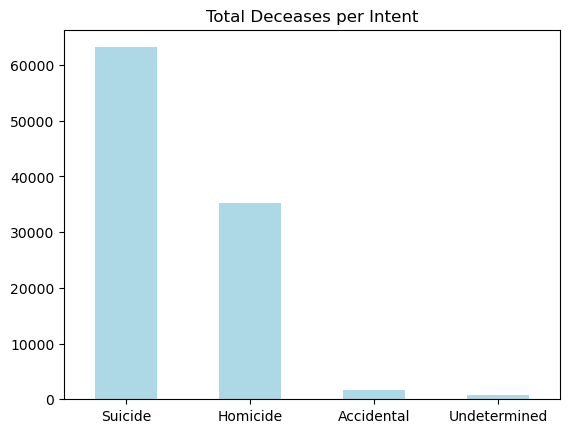

In [13]:
# Know the total deseases
total_muertes = df.shape[0]
print("Total de muertes:", total_muertes)
# Counting deceases per 'intent'
conteo_por_intent = df['intent'].value_counts()
# Graph
conteo_por_intent.plot(kind='bar', color='lightblue',rot=0)
plt.title('Total Deceases per Intent')
display(conteo_por_intent)

In [14]:
# Counting deceases per 'intent' & 'education'
conteo_por_intent_education = df.groupby(['intent', 'education']).size().unstack(fill_value=0)
display(conteo_por_intent_education)

education,BA+,HS/GED,Less than HS,Some college
intent,,,,
Accidental,146,674,492,327
Homicide,1559,16138,11839,5640
Suicide,11148,27203,9292,15533
Undetermined,93,334,200,180


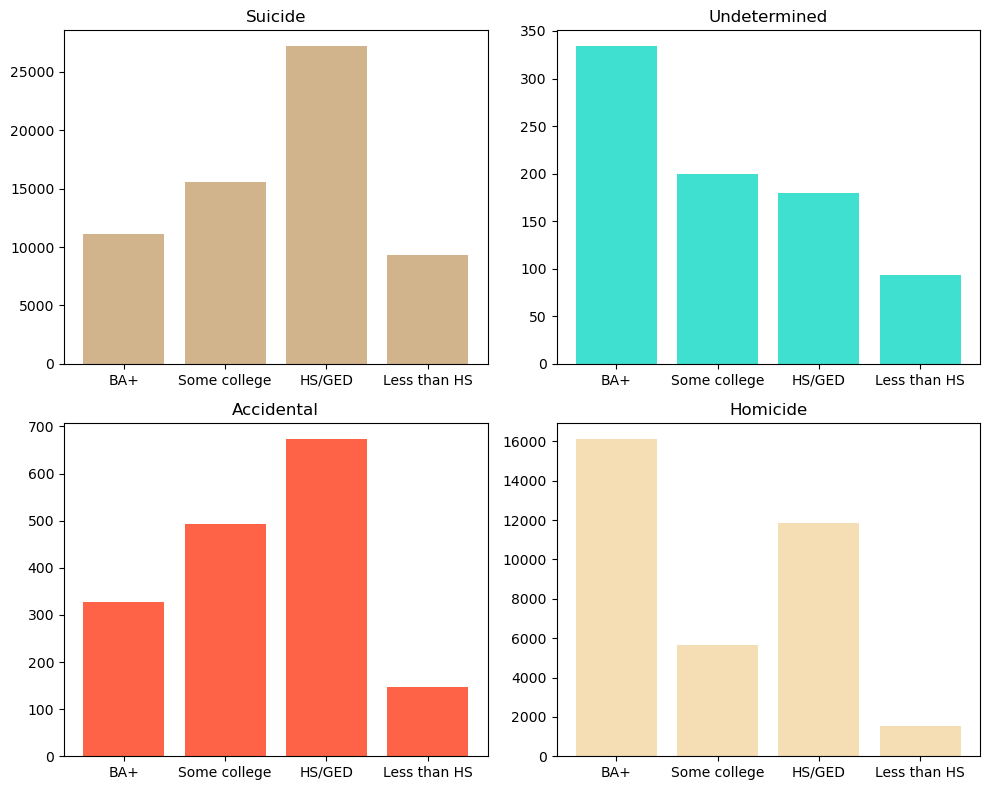

In [15]:
#Make a variable that contains the unique values of Intent 
intent_types = df['intent'].unique()
#Make a variable that contains colors for the graphs
colors = ['tan', 'turquoise', 'tomato', 'wheat']
#Adding a figure to subplot in a matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
#Make a loop starting with 1 that create a new grouped Dataframe
for i, intent_type in enumerate(intent_types, start=1):
    df_intent = df[df['intent'] == intent_type]
    Grouped_df_ = df_intent.groupby('education', sort=False).count()
    #Create a graph for every new grouped DataFrame
    plt.subplot(2, 2, i)
    plt.bar(df['education'].unique(), Grouped_df_['intent'], color=colors[i-1])
    plt.title(intent_type)

plt.tight_layout()
plt.show()


C:\Users\covek\AppData\Local\Temp\ipykernel_16268\3755484108.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df_dummies = df_dummies.groupby('education', sort=False).sum()


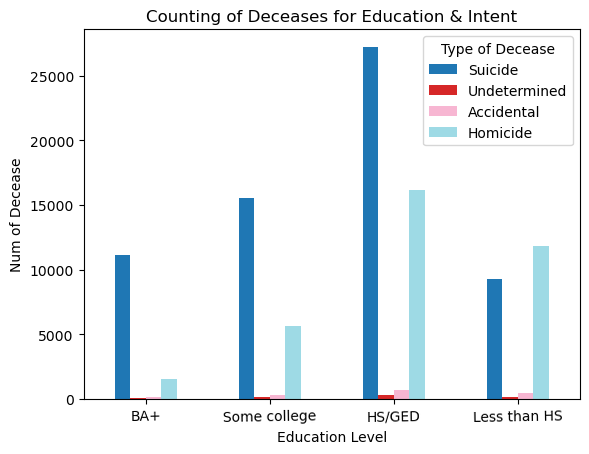

In [16]:
#Create costumatable bars with get dummies
intent_dummies = pd.get_dummies(df['intent'])
# Concat Rows with the original Dataframe
df_dummies = pd.concat([df, intent_dummies], axis=1)
# Agrupation with 'education' and add rows
grouped_df_dummies = df_dummies.groupby('education', sort=False).sum()

# Graph
grouped_df_dummies[['Suicide', 'Undetermined', 'Accidental', 'Homicide']].plot(kind='bar', rot=1,colormap='tab20')
plt.title('Counting of Deceases for Education & Intent')
plt.xlabel('Education Level')
plt.ylabel('Num of Decease')
plt.legend(title='Type of Decease')

plt.show()

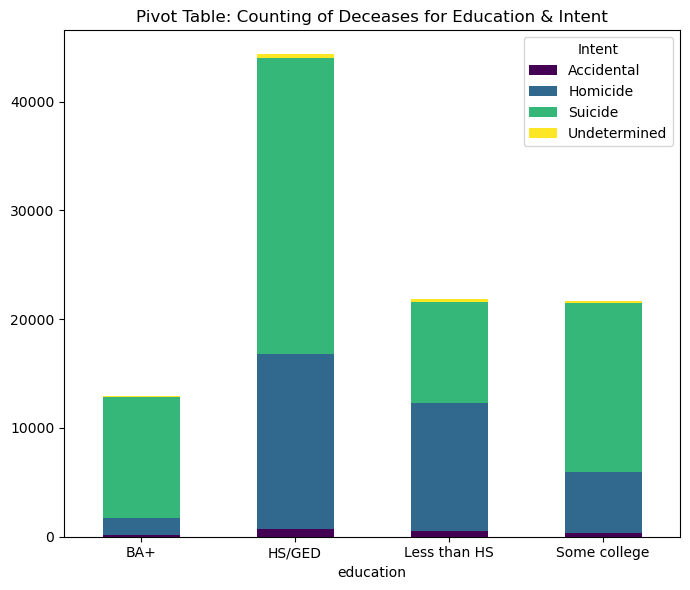

In [17]:
# Create a pivot table for a graph
pivot_table = df.pivot_table(index='education', columns='intent', values='age', aggfunc='count', fill_value=0)
# BarGraph with pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(7, 6),colormap='viridis',rot=0)
plt.title('Pivot Table: Counting of Deceases for Education & Intent')
plt.legend(title='Intent')

# Show graphs
plt.tight_layout()
plt.show()

# More analysis

In [9]:
import seaborn as sns

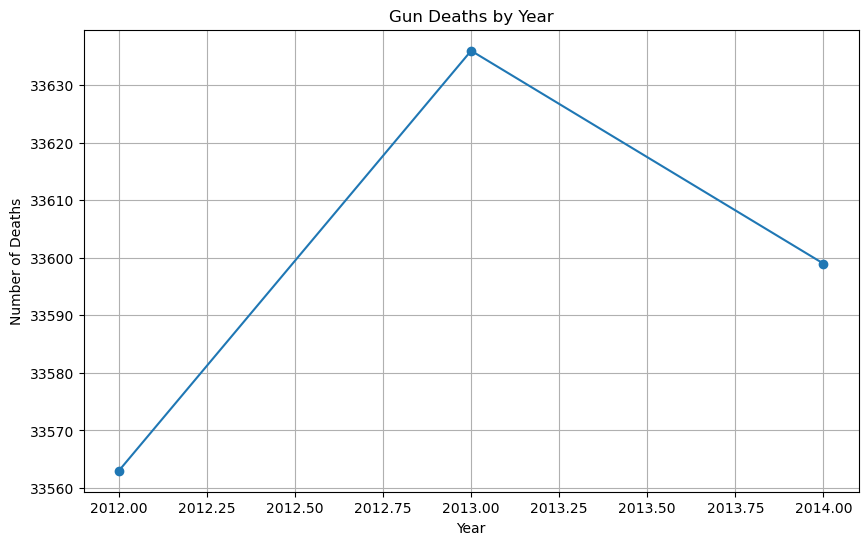

In [10]:
# 1. Gun Deaths by Year
import warnings
warnings.simplefilter(action='ignore', category=Warning) # Suppressing Warnings

plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(marker='o')
plt.title('Gun Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

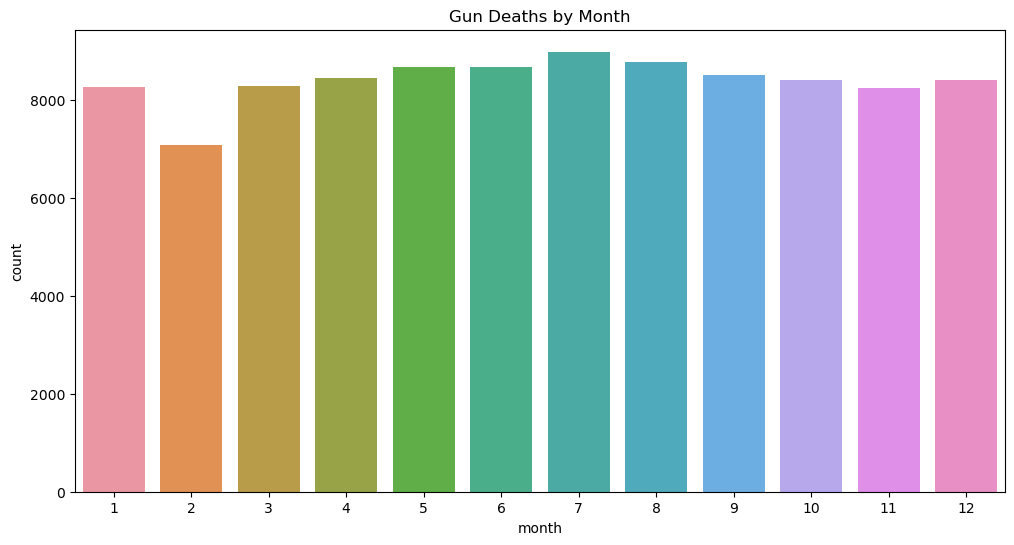

In [11]:
# 2. Gun Deaths by Month
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df)
plt.title('Gun Deaths by Month')
plt.show()

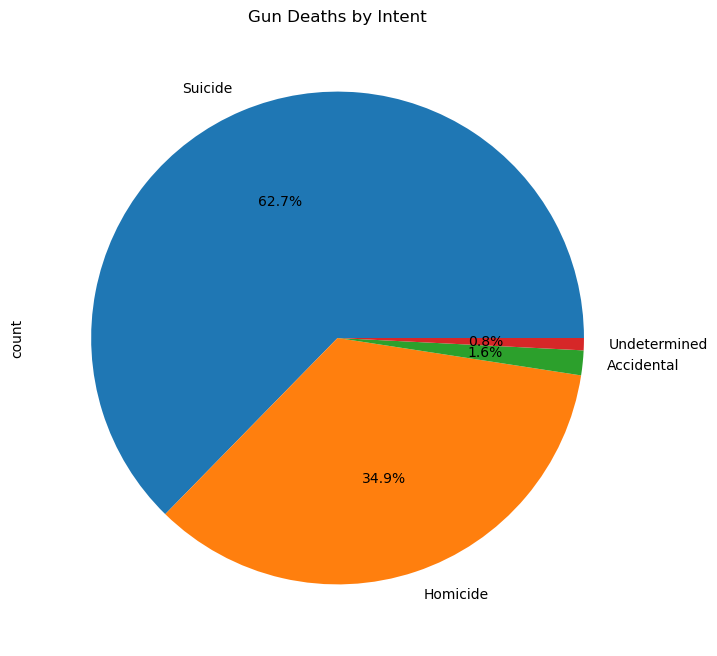

In [12]:
# 3. Gun Deaths by Intent
plt.figure(figsize=(8, 8))
df['intent'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gun Deaths by Intent')
plt.show()

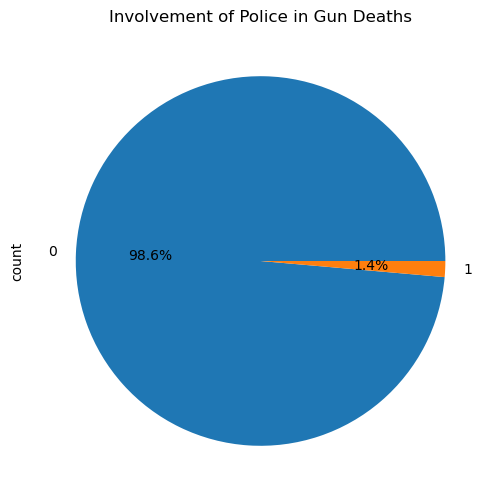

In [13]:
# 4. Proportion of Gun Deaths Involving Police
plt.figure(figsize=(6, 6))
df['police'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Involvement of Police in Gun Deaths')
plt.show()

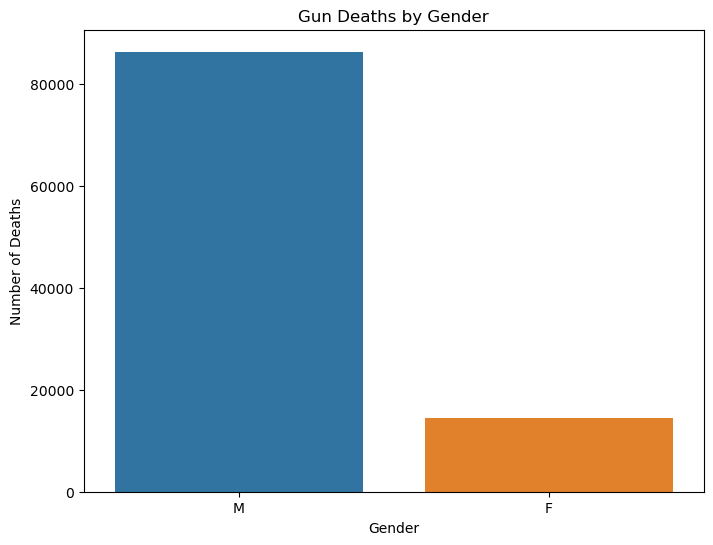

In [16]:
# 5. Gun Deaths by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Gun Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.show()

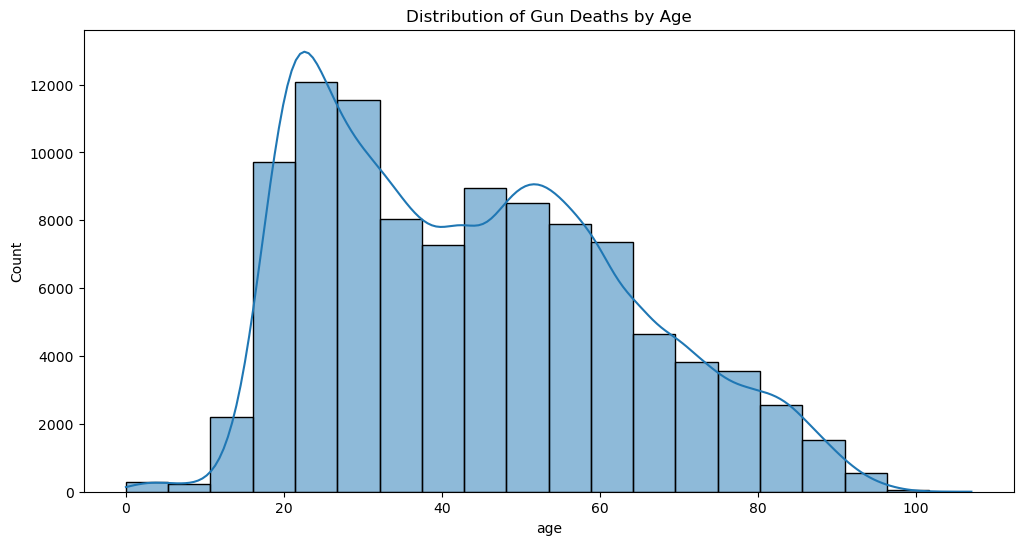

In [17]:
# 6. Distribution of Gun Deaths by Age Groups
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Gun Deaths by Age')
plt.show()

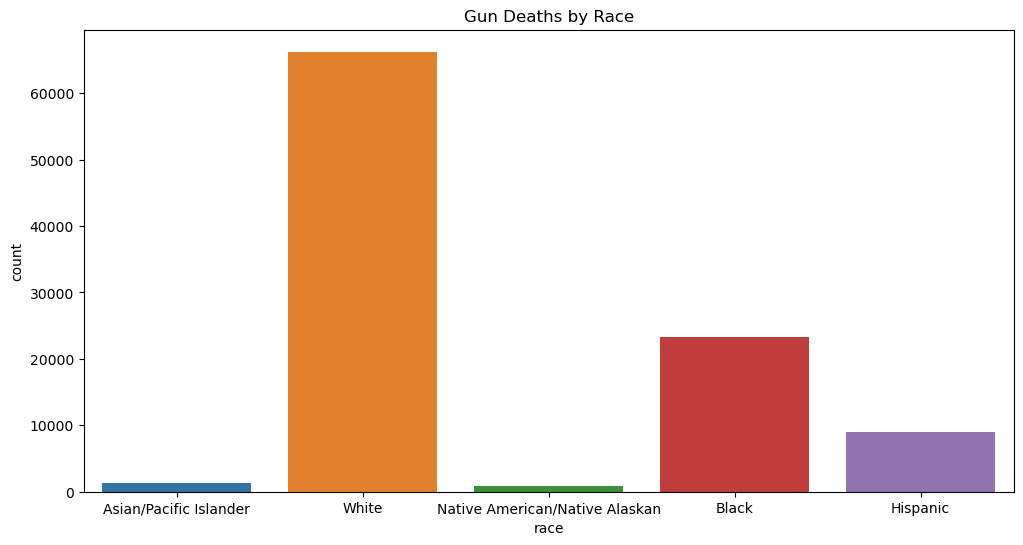

In [15]:
# 7. Gun Deaths by Race
plt.figure(figsize=(12, 6))
sns.countplot(x='race', data=df)
plt.title('Gun Deaths by Race')
plt.show()

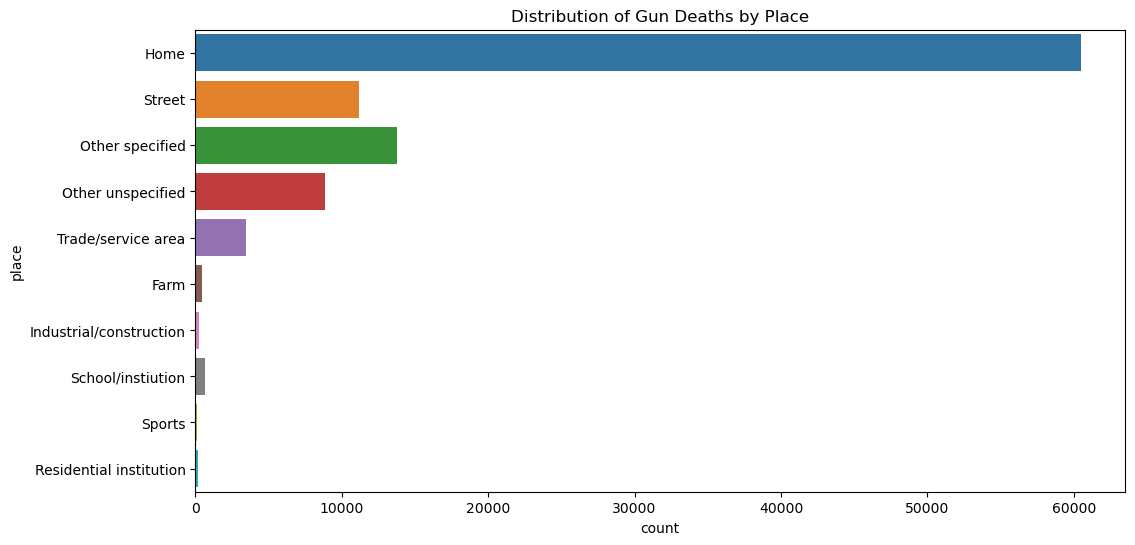

In [18]:
# 8. Distribution of Gun Deaths by Place
plt.figure(figsize=(12, 6))
sns.countplot(y='place', data=df)
plt.title('Distribution of Gun Deaths by Place')
plt.show()

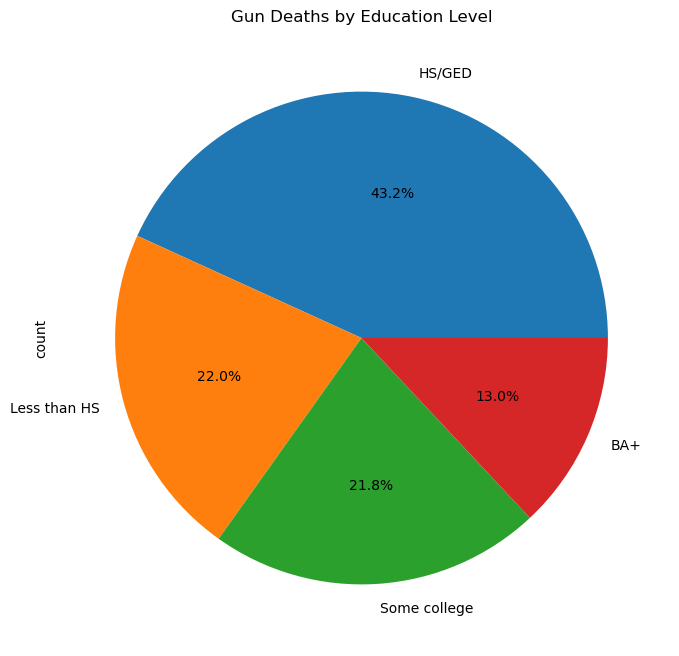

In [19]:
# 9. Relationship Between Education Level and Gun Deaths
plt.figure(figsize=(8, 8))
df['education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gun Deaths by Education Level')
plt.show()